In [1]:
import pickle
import glob
import numpy as np
import pandas as pd

In [2]:
order = [pickle.load(open(i, "rb")) for i in glob.glob("data/order/*")]

In [3]:
no_order = [pickle.load(open(i, "rb")) for i in glob.glob("data/no_order/*")]

In [4]:
results = {"lang": [],
          "order_overall": [],
          "noorder_overall": [],
           "order_word": [],
           "noorder_word": [],
           "order_lemma": [],
           "noorder_lemma": [],
           "count": [],
           "word_count": [],
           "lemma_count": [],
          }

df = []
for i in order + no_order:
    if i == {}:
        continue
    df += [pd.DataFrame(i, index=["overall", "word_acc", "lemma_acc", "count", "word_missing", "lemma_count", "lemma_missing"])]
                     
df = pd.concat(df, axis=1).transpose().reset_index().sort_values(by=["level_0", "level_1"])

df = df.loc[df["lemma_acc"] < 1]

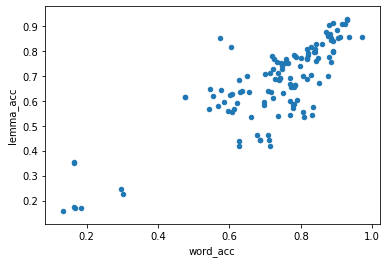

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot(kind='scatter',x='word_acc',y='lemma_acc')


In [6]:
ord_df = df[["level_0", "level_1", "lemma_acc"]].pivot_table(index='level_0',columns='level_1',values='lemma_acc')

In [7]:
ord_df

level_1,no_order,order
level_0,,
UD_Afrikaans-AfriBooms,0.858300,0.882591
UD_Ancient_Greek-PROIEL,0.642857,0.626374
UD_Ancient_Greek-Perseus,0.557851,0.553719
UD_Arabic-NYUAD,0.352357,0.356824
UD_Arabic-PADT,0.692308,0.692308
UD_Basque-BDT,0.778816,0.769470
UD_Bulgarian-BTB,0.707031,0.710938
UD_Catalan-AnCora,0.445004,0.462636
UD_Chinese-GSD,0.638132,0.595331


In [8]:
np.mean((ord_df["order"] - ord_df["no_order"]) > 0)

0.48333333333333334